In [1]:
from Models.NilmCnn1D import CNN_1D
from Data.data_processing import normalize
from Data.data_processing import prepareData
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error


In [2]:
house2 = pd.read_csv("Data/CLEAN_House2.csv", nrows=10000000)

print(house2.columns)

Index(['Time', 'Unix', 'Aggregate', 'Appliance1', 'Appliance2', 'Appliance3',
       'Appliance4', 'Appliance5', 'Appliance6', 'Appliance7', 'Appliance8',
       'Appliance9', 'Issues'],
      dtype='object')


In [3]:
sequence_length = 200

house2_normalized, scalers = normalize(house2, ["Aggregate","Appliance1"])
house2_normalized.head()
house2_normalized.describe()

,Aggregate,Appliance1
count,5.733526e+06,5.733526e+06
mean,1.891044e-02,2.116456e-02
std,4.320306e-02,2.701348e-02
min,0.000000e+00,0.000000e+00
25%,4.391136e-03,5.917160e-04
50%,6.830657e-03,5.917160e-04
75%,1.345802e-02,4.970414e-02
max,1.000000e+00,1.000000e+00


In [4]:
X = prepareData(house2_normalized['Aggregate'], sequence_length = sequence_length)
y = prepareData(house2_normalized['Appliance1'], sequence_length = sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,shuffle=False)


In [5]:
y = y_test.flatten()

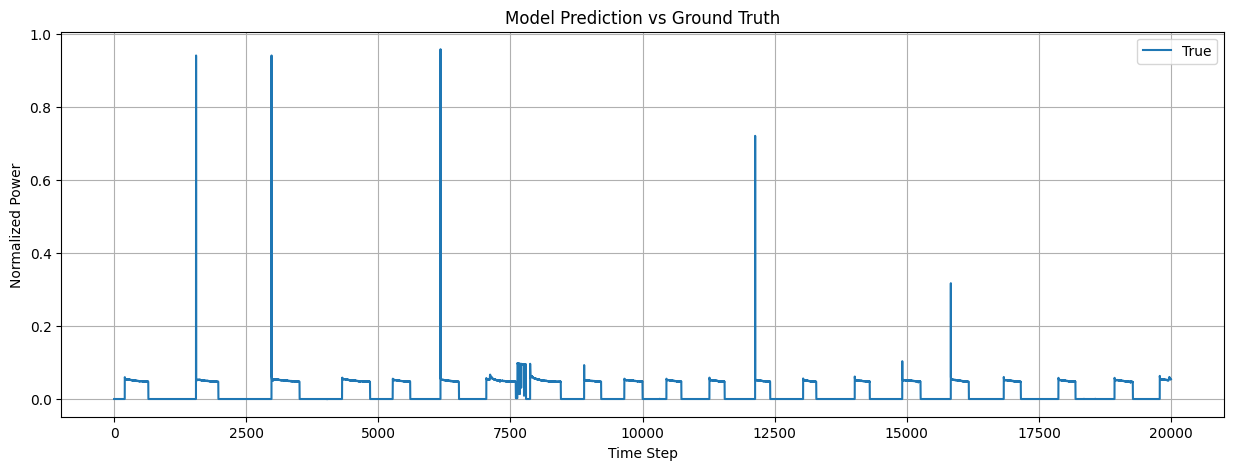

In [6]:
start_index = 0
num_points = 20000

end_index = start_index + num_points
x = range(start_index, end_index)

plt.figure(figsize=(15, 5))
plt.plot(x, y[start_index:end_index], label='True')
plt.title("Model Prediction vs Ground Truth")
plt.xlabel("Time Step")
plt.ylabel("Normalized Power")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
print(X_train.shape)

(22933, 200, 1)


In [8]:
model_former = CNN_1D

model = model_former.build_model(input_Length = sequence_length, kernel1_size= 5, kernel2_size = 3, dense_neuron_count = 256, filters1_count= 64, filters2_count= 128)

early_stop = EarlyStopping(monitor='val_loss', patience = 5, min_delta=1e-10, restore_best_weights=True)

c:\Users\rcper\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(X_train, y_train, epochs=100, batch_size=200, validation_data=[X_test,y_test], callbacks=[early_stop])

Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 7.9655e-04 - mae: 0.0241 - val_loss: 6.7558e-04 - val_mae: 0.0234
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 6.4620e-04 - mae: 0.0221 - val_loss: 5.6461e-04 - val_mae: 0.0192
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 5.4282e-04 - mae: 0.0179 - val_loss: 5.3633e-04 - val_mae: 0.0180
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 5.1592e-04 - mae: 0.0171 - val_loss: 5.2070e-04 - val_mae: 0.0167
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 5.0262e-04 - mae: 0.0165 - val_loss: 5.1238e-04 - val_mae: 0.0165
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 4.8667e-04 - mae: 0.0160 - val_loss: 5.3044e-04 - val_mae: 0.0162
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 5.0131e-04 - mae: 0.0162 - val_loss: 5.0593e-04 - val_mae: 0.0163
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 4.8685e-04 - mae: 0.0160 - val_loss: 5.056

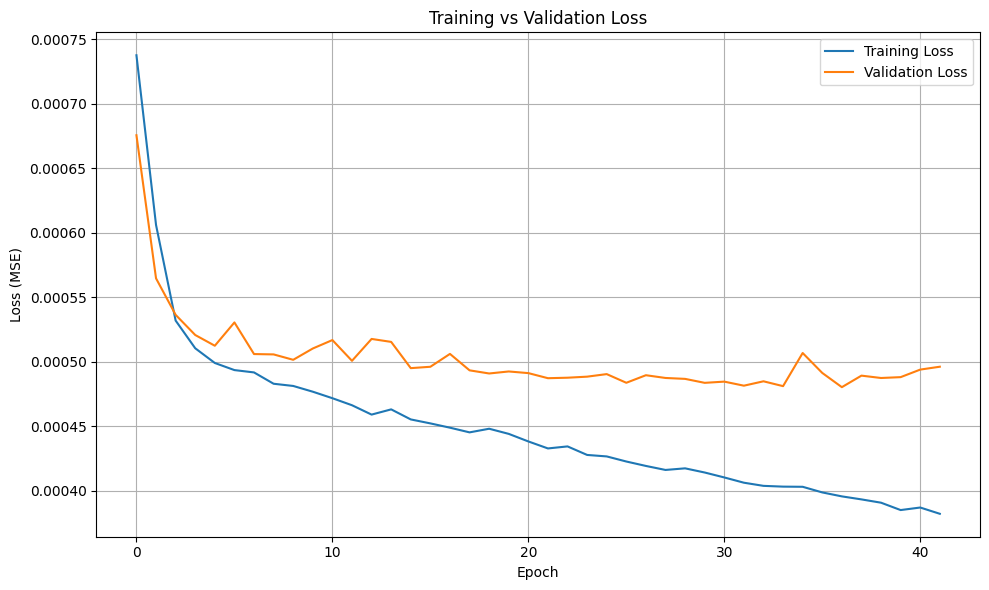

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
y_pred = model.predict(X_test).flatten()
y_true = y_test.flatten()



180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


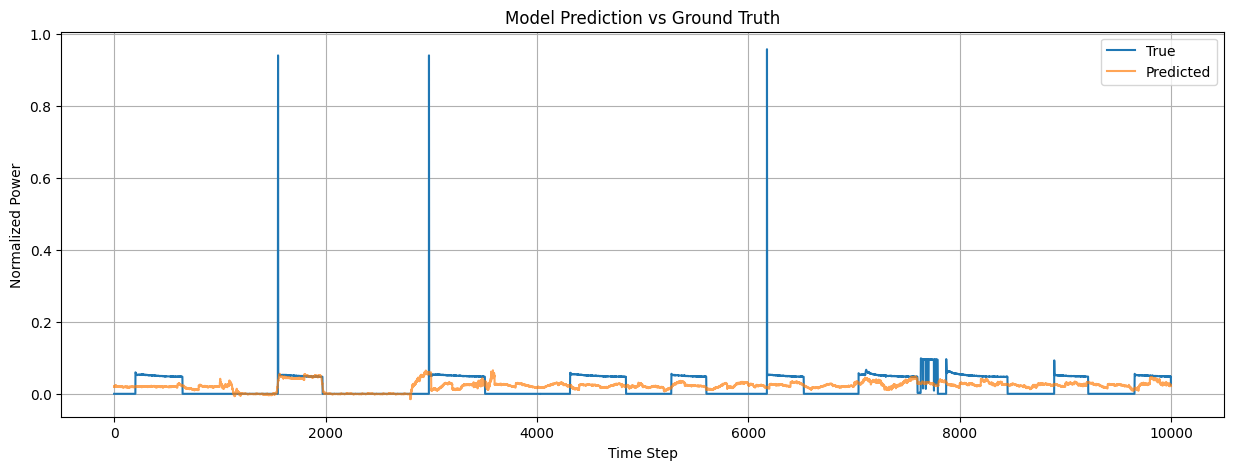

In [12]:
start_index = 0
num_points = 10000

end_index = start_index + num_points
x = range(start_index, end_index)

plt.figure(figsize=(15, 5))
plt.plot(x, y_true[start_index:end_index], label='True')
plt.plot(x, y_pred[start_index:end_index], label='Predicted', alpha=0.7)
plt.title("Model Prediction vs Ground Truth")
plt.xlabel("Time Step")
plt.ylabel("Normalized Power")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
mae_norm = mean_absolute_error(y_true, y_pred)
print(f"MAE (normalized units): {mae_norm:.4f}")


agg_scaler = scalers["Aggregate"]          # the scaler you used for Aggregate
y_pred_watts = agg_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_true_watts = agg_scaler.inverse_transform(y_true.reshape(-1, 1)).flatten()

mae_watts = mean_absolute_error(y_true_watts, y_pred_watts)
print(f"MAE (real scale): {mae_watts:.2f} W")

MAE (normalized units): 0.0148
MAE (real scale): 364.87 W
